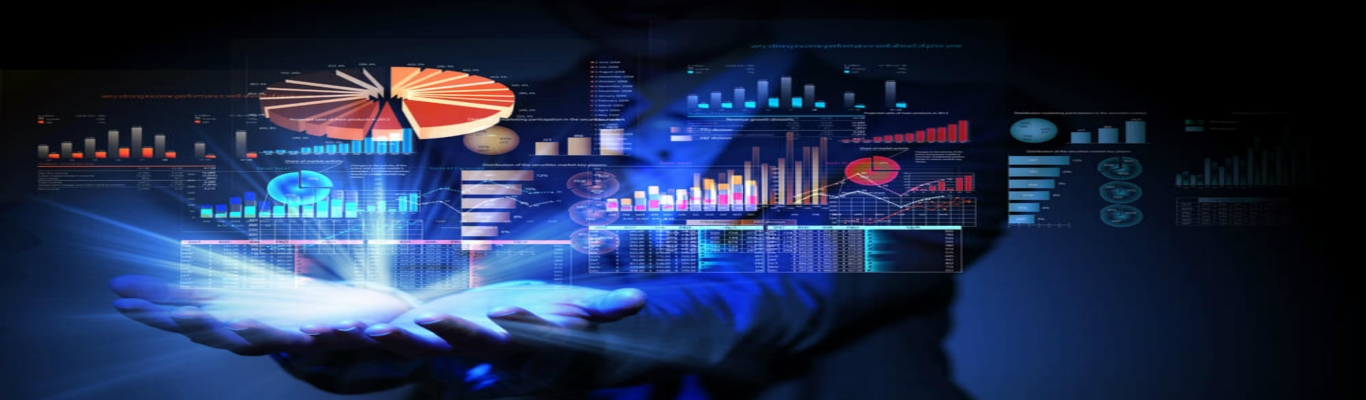

# <font color = Blue > Final Project - Data Analytics Practitioner </font>  

# <font color = Orange>  Data Science <Font color = Blue> and Tech Salaries </font>

### <font color = yellowgreen > Import Libraries and Dataset </font>

In [33]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings   ######################## ignore warning
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', None) ## show all the columns in dataset
pd.set_option('display.max_rows', None) ## show all rows in dataset

df = pd.read_excel("FinalProjectTechSalary.xlsx")  # load, read the data

In [34]:
df.head()

,Company,Title,TotalYearlyCompensation,Location,YearsOFExperience,YearsAtCompany,BaseSalary,Gender,Race,Education
0,10x Genomics,Software Engineer,161000,"Pleasanton, CA",2,1.0,125000,Male,Asian,Master's Degree
1,10x Genomics,Software Engineer,185000,"Placerville, CA",1,1.0,135000,Male,Asian,PhD
2,23andMe,Software Engineer,146000,"Mountain View, CA",0,0.0,125000,Male,Asian,Bachelor's Degree
3,2U,Software Engineer,188000,"New York, NY",24,2.0,155000,Male,Black,Bachelor's Degree
4,2U,Software Engineer,115000,"New York, NY",3,2.0,105000,Male,White,Bachelor's Degree


# <font color = yellowgreen> Data Prep & Cleaning </font>

In [ ]:
#prior to exploring the data, 
#the dataset needs to be clean, 
#all variables are in their proper format, 
#and the data is free of missing, abnormal, 
#or outlier values

In [35]:
df.shape

(20639, 10)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20639 entries, 0 to 20638
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  20639 non-null  object 
 1   Title                    20639 non-null  object 
 2   TotalYearlyCompensation  20639 non-null  int64  
 3   Location                 20639 non-null  object 
 4   YearsOFExperience        20639 non-null  int64  
 5   YearsAtCompany           20639 non-null  float64
 6   BaseSalary               20639 non-null  int64  
 7   Gender                   20639 non-null  object 
 8   Race                     20639 non-null  object 
 9   Education                20639 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.6+ MB


In [37]:
####### CHECK OUTLIERS ######

## Create a copy of your dataset to filter outliers
dfz = df.copy()

## Check original shape of the dataset
print(dfz.shape)

(20639, 10)


In [39]:
## Create a new column to contain the z-scores 
## Set the new column equal to the absolute value of the z-scores
## To calculate z-score -- stats.zscore(data/column name)
## To determine absolute value of z-score -- np.abs(data/function/options)

import scipy.stats as stats

dfz["zscore_totalyearlycompensation"] = np.abs(stats.zscore(dfz["TotalYearlyCompensation"]))

dfz.head()

,Company,Title,TotalYearlyCompensation,Location,YearsOFExperience,YearsAtCompany,BaseSalary,Gender,Race,Education,zscore_totalyearlycompensation
0,10x Genomics,Software Engineer,161000,"Pleasanton, CA",2,1.0,125000,Male,Asian,Master's Degree,0.286666
1,10x Genomics,Software Engineer,185000,"Placerville, CA",1,1.0,135000,Male,Asian,PhD,0.064435
2,23andMe,Software Engineer,146000,"Mountain View, CA",0,0.0,125000,Male,Asian,Bachelor's Degree,0.425560
3,2U,Software Engineer,188000,"New York, NY",24,2.0,155000,Male,Black,Bachelor's Degree,0.036656
4,2U,Software Engineer,115000,"New York, NY",3,2.0,105000,Male,White,Bachelor's Degree,0.712608


In [40]:
## Determine the index locations for the rows with zscores that are greater than "3"
z_outliers = dfz.loc[dfz["zscore_totalyearlycompensation"] > 3].index

## Preview list of index values                            
print("INDEX VALUES:", z_outliers)    ### 306 outliers

INDEX VALUES: Int64Index([  228,   284,   385,   417,   419,   425,   527,   533,   684,
              750,
            ...
            19489, 19553, 19556, 19803, 19814, 19964, 19967, 20179, 20299,
            20500],
           dtype='int64', length=306)


In [41]:
## Drop rows with above index values 
dfz = dfz.drop(z_outliers)

## Re-check the shape of the dataframe, how many rows were dropped?
print(dfz.shape)

(20333, 11)


In [42]:
dfz = dfz.drop(columns = "zscore_totalyearlycompensation") # Drop the Zscore column

In [43]:
dfz.shape  # new data shape
df = dfz.copy()  # clean data info
df.shape

(20333, 10)

In [44]:
df.to_csv("New_Clean_Salary_Data.csv")  #save the clean data after removing Outliers

# <font color = yellowgreen> Data Analysis </font>

In [45]:
df.corr()

,TotalYearlyCompensation,YearsOFExperience,YearsAtCompany,BaseSalary
TotalYearlyCompensation,1.000000,0.385117,0.146158,0.869500
YearsOFExperience,0.385117,1.000000,0.540002,0.397382
YearsAtCompany,0.146158,0.540002,1.000000,0.168646
BaseSalary,0.869500,0.397382,0.168646,1.000000


In [46]:
df.describe()#Statistical Measures

,TotalYearlyCompensation,YearsOFExperience,YearsAtCompany,BaseSalary
count,20333.000000,20333.000000,20333.000000,20333.000000
mean,186331.874293,6.891851,2.630969,131124.428269
std,98422.716928,5.694848,3.253309,51500.385921
min,10000.000000,0.000000,0.000000,4000.000000
25%,117000.000000,3.000000,0.000000,100000.000000
50%,171000.000000,5.000000,2.000000,135000.000000
75%,240000.000000,10.000000,4.000000,161000.000000
max,515000.000000,45.000000,40.000000,504000.000000


In [47]:
df['TotalYearlyCompensation'].mean()  #The average value

186331.8742930212

In [48]:
df['TotalYearlyCompensation'].mode()  # The most common value

0    150000
Name: TotalYearlyCompensation, dtype: int64

In [49]:
df['TotalYearlyCompensation'].median()  #The mid point value

171000.0

In [83]:
df['TotalYearlyCompensation'].max()   # maximum yearly compensation 

515000

In [77]:
pd.crosstab(df["Race"], df["BaseSalary"], margins = True)

BaseSalary,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000,21000,22000,23000,24000,25000,26000,27000,28000,29000,30000,31000,32000,33000,34000,35000,36000,37000,38000,39000,40000,41000,42000,43000,44000,45000,46000,47000,48000,49000,50000,51000,52000,53000,54000,55000,56000,57000,58000,59000,60000,61000,62000,63000,64000,65000,66000,67000,68000,69000,70000,71000,72000,73000,74000,75000,76000,77000,78000,79000,80000,81000,82000,83000,84000,85000,86000,87000,88000,89000,90000,91000,92000,93000,94000,95000,96000,97000,98000,99000,100000,101000,102000,103000,104000,105000,106000,107000,108000,109000,110000,111000,112000,113000,114000,115000,116000,117000,118000,119000,120000,121000,122000,123000,124000,125000,126000,127000,128000,129000,130000,131000,132000,133000,134000,135000,136000,137000,138000,139000,140000,141000,142000,143000,144000,145000,146000,147000,148000,149000,150000,151000,152000,153000,154000,155000,156000,157000,158000,159000,160000,161000,162000,163000,164000,165000,166000,167000,168000,169000,170000,171000,172000,173000,174000,175000,176000,177000,178000,179000,180000,181000,182000,183000,184000,185000,186000,187000,188000,189000,190000,191000,192000,193000,194000,195000,196000,197000,198000,199000,200000,201000,202000,203000,204000,205000,206000,207000,208000,209000,210000,211000,212000,213000,214000,215000,216000,217000,218000,219000,220000,221000,222000,223000,224000,225000,226000,227000,228000,229000,230000,231000,232000,233000,234000,235000,236000,237000,238000,239000,240000,242000,243000,244000,245000,246000,247000,249000,250000,251000,252000,253000,254000,255000,256000,258000,260000,261000,262000,264000,265000,266000,268000,270000,274000,275000,276000,277000,278000,280000,282000,283000,285000,286000,288000,290000,291000,295000,296000,300000,306000,309000,310000,315000,320000,325000,340000,345000,350000,374000,383000,385000,390000,400000,420000,425000,430000,435000,441000,450000,465000,475000,480000,485000,490000,500000,504000,All
Race,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Asian,1,2,0,1,2,2,29,20,15,14,19,22,27,24,36,42,54,38,45,42,29,43,27,47,33,24,45,16,31,26,26,49,37,36,31,20,58,35,29,33,33,47,24,33,33,9,39,20,15,12,26,27,11,27,18,18,40,18,17,19,15,43,21,16,30,25,57,18,33,17,19,71,25,19,46,27,88,25,32,24,31,61,21,30,33,15,84,21,26,31,24,78,32,35,35,17,187,35,43,41,33,87,25,38,51,19,182,51,65,43,25,136,87,40,71,53,266,38,41,59,34,201,40,51,73,45,295,51,58,47,53,241,32,62,64,29,298,39,68,44,91,229,53,53,55,38,341,30,74,54,38,223,60,40,55,34,457,30,55,27,29,196,21,45,36,20,236,15,40,19,31,163,28,26,27,17,200,19,25,22,29,165,20,17,19,11,125,17,17,17,15,77,14,13,24,9,183,9,8,9,10,61,10,8,8,8,65,3,10,1,6,20,11,3,7,1,56,1,4,2,3,40,6,6,3,4,28,3,3,2,1,20,0,1,0,2,22,1,1,0,5,1,1,0,27,0,3,0,0,3,1,0,10,0,0,0,3,0,0,3,1,0,1,0,0,2,1,0,1,1,1,4,0,0,1,4,1,0,3,2,2,1,1,0,1,1,0,0,0,2,2,1,2,0,0,2,1,0,0,0,0,0,0,10949
Black,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,2,1,3,0,0,1,0,1,2,1,5,1,1,0,3,6,3,1,0,0,3,3,8,2,2,8,3,3,6,1,12,1,4,2,1,7,1,0,6,1,8,3,0,3,3,12,2,3,4,2,19,1,8,4,0,6,3,0,2,1,15,12,7,6,2,12,2,6,6,2,19,5,1,1,5,9,5,2,6,3,12,5,3,5,4,12,0,3,0,1,15,3,2,3,6,10,3,3,3,4,18,1,2,3,0,11,2,2,2,1,11,0,2,0,2,9,2,2,2,1,8,1,1,1,6,8,0,0,1,1,10,0,1,0,2,2,1,2,1,0,1,1,0,0,2,2,0,2,1,0,3,0,0,2,0,1,3,0,0,0,2,0,0,1,0,2,0,0,1,0,4,0,0,0,0,1,1,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,3,0,0,0,1,0,0,0,0,1,1,0,2,0,582
Hispanic,0,0,1,0,0,1,0,0,1,0,0,1,1,2,1,1,2,0,2,2,2,1,2,1,1,4,1,0,0,3,1,1,1,1,1,0,1,2,1,2,0,0,1,1,0,1,4,0,1,0,3,2,0,0,1,1,1,1,3,0,2,2,1,1,1,0,10,2,3,7,1,2,2,4,5,5,11,0,2,9,2,14,4,5,2,4,11

In [78]:
pd.crosstab(df["Gender"], df["BaseSalary"], margins = True)

BaseSalary,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000,21000,22000,23000,24000,25000,26000,27000,28000,29000,30000,31000,32000,33000,34000,35000,36000,37000,38000,39000,40000,41000,42000,43000,44000,45000,46000,47000,48000,49000,50000,51000,52000,53000,54000,55000,56000,57000,58000,59000,60000,61000,62000,63000,64000,65000,66000,67000,68000,69000,70000,71000,72000,73000,74000,75000,76000,77000,78000,79000,80000,81000,82000,83000,84000,85000,86000,87000,88000,89000,90000,91000,92000,93000,94000,95000,96000,97000,98000,99000,100000,101000,102000,103000,104000,105000,106000,107000,108000,109000,110000,111000,112000,113000,114000,115000,116000,117000,118000,119000,120000,121000,122000,123000,124000,125000,126000,127000,128000,129000,130000,131000,132000,133000,134000,135000,136000,137000,138000,139000,140000,141000,142000,143000,144000,145000,146000,147000,148000,149000,150000,151000,152000,153000,154000,155000,156000,157000,158000,159000,160000,161000,162000,163000,164000,165000,166000,167000,168000,169000,170000,171000,172000,173000,174000,175000,176000,177000,178000,179000,180000,181000,182000,183000,184000,185000,186000,187000,188000,189000,190000,191000,192000,193000,194000,195000,196000,197000,198000,199000,200000,201000,202000,203000,204000,205000,206000,207000,208000,209000,210000,211000,212000,213000,214000,215000,216000,217000,218000,219000,220000,221000,222000,223000,224000,225000,226000,227000,228000,229000,230000,231000,232000,233000,234000,235000,236000,237000,238000,239000,240000,242000,243000,244000,245000,246000,247000,249000,250000,251000,252000,253000,254000,255000,256000,258000,260000,261000,262000,264000,265000,266000,268000,270000,274000,275000,276000,277000,278000,280000,282000,283000,285000,286000,288000,290000,291000,295000,296000,300000,306000,309000,310000,315000,320000,325000,340000,345000,350000,374000,383000,385000,390000,400000,420000,425000,430000,435000,441000,450000,465000,475000,480000,485000,490000,500000,504000,All
Gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Female,0,1,0,0,0,0,6,2,2,1,3,0,6,1,4,6,4,3,5,4,5,5,4,7,4,7,4,3,1,1,3,5,9,3,5,1,5,1,1,2,5,6,4,2,3,1,7,2,4,5,5,0,1,1,6,2,9,3,4,3,7,14,7,4,10,6,16,5,10,11,8,20,12,9,12,13,35,10,9,10,14,25,10,17,10,9,35,10,11,14,9,28,12,19,11,5,67,14,16,21,9,41,8,11,22,9,78,26,16,24,4,59,25,13,28,15,116,14,20,26,19,64,21,13,24,23,111,25,24,23,21,87,12,18,27,15,92,19,22,12,36,89,20,16,14,11,113,18,22,19,16,65,18,14,20,19,123,10,14,10,12,57,6,12,15,5,87,7,13,12,9,38,8,6,6,11,61,5,7,7,12,38,7,7,7,7,32,5,7,4,5,24,6,5,10,2,40,0,6,6,2,14,1,4,3,1,12,1,3,0,3,7,3,0,3,0,14,0,0,2,1,13,1,0,2,1,5,0,1,0,2,4,0,0,1,1,2,0,0,0,0,0,0,1,9,0,0,0,0,1,0,0,2,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4,1,0,2,0,2,0,0,0,0,1,0,0,0,3443
Male,1,1,1,1,2,3,25,18,15,14,19,25,24,25,35,43,53,40,45,45,29,44,29,44,34,26,55,18,45,34,34,56,43,41,37,23,69,47,43,41,37,57,28,37,45,13,64,20,21,16,33,39,20,39,36,27,56,26,23,27,25,72,32,29,39,30,94,45,64,31,30,108,45,48,86,37,154,37,65,59,52,124,49,55,79,32,153,42,61,67,48,152,53,57,72,38,315,53,76,71,57,146,61,58,84,36,285,100,107,71,57,213,127,70,112,71,380,59,76,81,54,308,65,71,111,62,414,77,95,72,83,338,58,91,88,44,417,57,109,82,133,317,69,87,81,72,514,43,111,81,53,322,94,75,104,48,661,48,78,59,48,289,49,74,59,35,310,26,62,34,53,232,48,32,51,22,294,32,42,41,46,219,36,32,32,20,191,25,31,31,28,124,25,25,41,11,283,27,20,17,24,101,21,15,17,12,117,7,16,6,9,48,21,10,9,8,111,3,7,10,6,61,9,12,6,6,48,6,5,5,1,25,1,4,4,4,52,4,4,3,8,3,1,2,50,1,5,2,1,6,1,2,15,0,1,1,8,1,1,7,1,2,1,1,2,6,1,1,1,2,1,5,1,1,2,4,1,1,2,1,1,1,3,1,4,1,0,1,0,5,3,1,2,1,0,5,1,2,3,0,1,3,1,16795
Other,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0

In [79]:
pd.crosstab(df["Title"], df["BaseSalary"], margins = True)

BaseSalary,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000,21000,22000,23000,24000,25000,26000,27000,28000,29000,30000,31000,32000,33000,34000,35000,36000,37000,38000,39000,40000,41000,42000,43000,44000,45000,46000,47000,48000,49000,50000,51000,52000,53000,54000,55000,56000,57000,58000,59000,60000,61000,62000,63000,64000,65000,66000,67000,68000,69000,70000,71000,72000,73000,74000,75000,76000,77000,78000,79000,80000,81000,82000,83000,84000,85000,86000,87000,88000,89000,90000,91000,92000,93000,94000,95000,96000,97000,98000,99000,100000,101000,102000,103000,104000,105000,106000,107000,108000,109000,110000,111000,112000,113000,114000,115000,116000,117000,118000,119000,120000,121000,122000,123000,124000,125000,126000,127000,128000,129000,130000,131000,132000,133000,134000,135000,136000,137000,138000,139000,140000,141000,142000,143000,144000,145000,146000,147000,148000,149000,150000,151000,152000,153000,154000,155000,156000,157000,158000,159000,160000,161000,162000,163000,164000,165000,166000,167000,168000,169000,170000,171000,172000,173000,174000,175000,176000,177000,178000,179000,180000,181000,182000,183000,184000,185000,186000,187000,188000,189000,190000,191000,192000,193000,194000,195000,196000,197000,198000,199000,200000,201000,202000,203000,204000,205000,206000,207000,208000,209000,210000,211000,212000,213000,214000,215000,216000,217000,218000,219000,220000,221000,222000,223000,224000,225000,226000,227000,228000,229000,230000,231000,232000,233000,234000,235000,236000,237000,238000,239000,240000,242000,243000,244000,245000,246000,247000,249000,250000,251000,252000,253000,254000,255000,256000,258000,260000,261000,262000,264000,265000,266000,268000,270000,274000,275000,276000,277000,278000,280000,282000,283000,285000,286000,288000,290000,291000,295000,296000,300000,306000,309000,310000,315000,320000,325000,340000,345000,350000,374000,383000,385000,390000,400000,420000,425000,430000,435000,441000,450000,465000,475000,480000,485000,490000,500000,504000,All
Title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Business Analyst,0,0,0,0,0,0,1,2,1,0,1,2,0,1,1,1,2,0,3,0,4,1,1,0,0,1,2,1,0,0,0,0,0,0,0,1,1,3,2,0,0,1,0,0,3,0,1,1,2,0,1,1,0,1,2,2,8,0,1,2,1,7,1,1,3,4,9,0,7,2,4,11,3,4,10,6,16,0,3,1,5,5,3,4,4,0,14,0,3,6,4,13,3,6,2,2,20,5,3,2,1,12,2,2,4,1,18,0,3,0,0,13,0,2,4,1,7,2,3,2,1,11,1,2,1,4,12,4,3,0,1,3,1,4,0,1,11,0,2,1,1,2,1,1,0,0,7,0,1,3,0,3,0,0,0,0,5,1,0,0,0,3,0,1,1,0,4,1,0,1,2,1,1,0,0,1,6,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,453
Data Scientist,0,0,0,0,0,0,2,0,0,3,1,0,1,1,0,3,0,2,3,1,0,2,0,0,2,3,2,3,4,1,1,0,2,1,1,1,5,3,2,0,1,5,1,0,2,1,0,1,0,0,4,0,0,0,1,0,1,2,2,1,0,2,3,1,5,1,2,2,3,1,2,5,3,2,3,1,7,1,3,4,1,7,2,3,3,1,8,7,3,2,2,12,4,3,6,0,17,2,3,3,2,8,5,2,6,3,10,1,4,4,1,14,2,5,0,3,23,5,6,5,6,18,3,4,7,1,23,1,7,7,3,17,6,3,5,3,29,4,4,9,3,23,4,4,3,1,38,2,9,4,4,29,7,5,5,3,35,2,1,3,3,14,0,4,2,1,22,3,3,3,4,12,1,0,2,3,15,4,4,5,1,13,2,5,1,0,6,1,0,0,1,9,1,3,0,0,13,1,1,0,2,3,0,1,0,1,4,0,0,0,0,0,0,0,0,0,5,0,0,1,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,864
Hardware Engineer,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,1,1,0,0,1,3,0,3,0,1,4,0,1,0,2,4,0,2,5,1,2,4,0,2,1,0,1,6,1,0,7,0,4,0,0,1,2,4,1,0,1,0,0,0,1,3,2,1,0,2,8,0,0,2,0,3,0,1,1,2,7,0,3,2,0,4,0,2,5,0,8,1,3,4,4,9,1,4,2,1,16,5,6,8,2,10,5,2,5,2,16,10,2,7,3,10,1,3,4,4,29,7,5,3,4,15,3,6,3,0,16,1,6,6,5,24,1,0,4,3,16,2,5,3,2,24,4,3,5,3,22,4,3,4,5,17,2,7,1,0,33,2,4,5,1,30,1,1,3,0,14,0,2,2

In [80]:
pd.crosstab(df["Education"], df["BaseSalary"], margins = True)

BaseSalary,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000,21000,22000,23000,24000,25000,26000,27000,28000,29000,30000,31000,32000,33000,34000,35000,36000,37000,38000,39000,40000,41000,42000,43000,44000,45000,46000,47000,48000,49000,50000,51000,52000,53000,54000,55000,56000,57000,58000,59000,60000,61000,62000,63000,64000,65000,66000,67000,68000,69000,70000,71000,72000,73000,74000,75000,76000,77000,78000,79000,80000,81000,82000,83000,84000,85000,86000,87000,88000,89000,90000,91000,92000,93000,94000,95000,96000,97000,98000,99000,100000,101000,102000,103000,104000,105000,106000,107000,108000,109000,110000,111000,112000,113000,114000,115000,116000,117000,118000,119000,120000,121000,122000,123000,124000,125000,126000,127000,128000,129000,130000,131000,132000,133000,134000,135000,136000,137000,138000,139000,140000,141000,142000,143000,144000,145000,146000,147000,148000,149000,150000,151000,152000,153000,154000,155000,156000,157000,158000,159000,160000,161000,162000,163000,164000,165000,166000,167000,168000,169000,170000,171000,172000,173000,174000,175000,176000,177000,178000,179000,180000,181000,182000,183000,184000,185000,186000,187000,188000,189000,190000,191000,192000,193000,194000,195000,196000,197000,198000,199000,200000,201000,202000,203000,204000,205000,206000,207000,208000,209000,210000,211000,212000,213000,214000,215000,216000,217000,218000,219000,220000,221000,222000,223000,224000,225000,226000,227000,228000,229000,230000,231000,232000,233000,234000,235000,236000,237000,238000,239000,240000,242000,243000,244000,245000,246000,247000,249000,250000,251000,252000,253000,254000,255000,256000,258000,260000,261000,262000,264000,265000,266000,268000,270000,274000,275000,276000,277000,278000,280000,282000,283000,285000,286000,288000,290000,291000,295000,296000,300000,306000,309000,310000,315000,320000,325000,340000,345000,350000,374000,383000,385000,390000,400000,420000,425000,430000,435000,441000,450000,465000,475000,480000,485000,490000,500000,504000,All
Education,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bachelor's Degree,0,2,1,1,2,1,27,17,15,11,17,22,28,24,31,39,44,31,32,43,20,30,27,42,27,18,39,15,30,25,22,35,35,29,23,15,33,28,20,31,21,36,25,17,24,9,34,13,15,9,21,19,11,25,26,15,36,13,19,20,18,51,28,23,31,25,61,35,47,23,27,83,39,39,75,29,130,34,55,48,42,100,42,41,58,29,111,35,47,51,32,111,36,42,52,31,214,39,53,44,34,109,38,41,55,23,189,74,71,50,30,138,73,33,83,47,280,35,50,44,42,179,49,40,61,31,243,57,58,45,49,193,36,50,54,30,216,35,54,49,94,158,40,45,33,31,282,29,56,42,28,156,49,33,50,23,304,36,27,39,26,136,25,41,27,15,143,12,27,21,33,109,24,14,22,12,125,17,15,25,18,84,11,16,14,11,88,14,12,10,10,59,14,10,20,5,110,9,11,10,13,41,7,10,9,4,51,4,9,2,6,26,8,5,5,5,45,1,4,4,3,31,3,5,4,2,12,3,3,2,0,11,0,1,3,3,21,1,4,1,3,2,0,2,17,1,3,2,0,2,0,0,6,1,0,1,3,1,0,2,0,0,1,1,1,1,0,2,0,2,1,3,1,0,2,2,0,0,1,1,0,1,2,1,3,0,1,0,1,2,3,0,2,1,2,3,0,2,1,1,1,3,0,9946
Highschool,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,0,0,1,1,2,0,1,4,0,2,2,1,3,0,0,0,0,1,1,1,2,0,3,0,0,2,2,0,0,0,0,2,0,2,0,1,0,2,2,1,0,0,1,4,0,0,0,0,5,2,1,1,0,1,0,1,0,2,3,0,0,0,0,1,1,1,1,1,2,0,1,1,1,1,0,2,2,0,8,0,3,5,1,2,0,2,1,1,6,0,1,0,0,6,2,2,1,0,3,0,1,1,2,6,1,1,1,2,5,1,1,3,1,3,3,1,0,1,3,1,4,0,0,2,1,1,0,2,10,0,1,5,0,4,1,2,0,1,9,0,3,1,2,4,2,1,2,1,4,0,3,0,0,6,0,0,1,0,4,0,3,1,0,3,2,2,1,0,0,0,1,2,0,1,0,0,0,0,4,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,2,0,0,0,3,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,278
Master's Degree,1,0,0,0,0,1,2,2,2,3,4,2,2,2,5,9,10,11,17,6,8,16,3,8,10,9,17,4,12,7,12,23,15,13,17,8,37,12,20,10,17,23,7,14,22,5,31,9,8,9,15,17,9,12,13,12,24,14,7,9,11,29,8,9,18,1

# <font color = yellowgreen> Modeling </font>

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20333 entries, 0 to 20638
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  20333 non-null  object 
 1   Title                    20333 non-null  object 
 2   TotalYearlyCompensation  20333 non-null  int64  
 3   Location                 20333 non-null  object 
 4   YearsOFExperience        20333 non-null  int64  
 5   YearsAtCompany           20333 non-null  float64
 6   BaseSalary               20333 non-null  int64  
 7   Gender                   20333 non-null  object 
 8   Race                     20333 non-null  object 
 9   Education                20333 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.7+ MB


In [51]:
## regression model
result = sm.ols('TotalYearlyCompensation ~  Title  + Gender + Race + Education', data=df).fit()

## print the regression model summary
result.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     TotalYearlyCompensation   R-squared:                       0.104
Model:                                 OLS   Adj. R-squared:                  0.103
Method:                      Least Squares   F-statistic:                     118.4
Date:                     Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                             23:46:23   Log-Likelihood:            -2.6150e+05
No. Observations:                    20333   AIC:                         5.230e+05
Df Residuals:                        20312   BIC:                         5.232e+05
Df Model:                               20                                         
Covariance Type:                 nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                              1.013e+05   4658.466     21.747      0.000    9.22e+04     1.1e+05
Title[T.Data Scientist]                3.586e+04   5462.950      6.565      0.000    2.52e+04    4.66e+04
Title[T.Hardware Engineer]             4.944e+04   5528.970      8.943      0.000    3.86e+04    6.03e+04
Title[T.Management Consultant]         2.665e+04   6197.360      4.299      0.000    1.45e+04    3.88e+04
Title[T.Product Designer]              7.093e+04   5786.406     12.258      0.000    5.96e+04    8.23e+04
Title[T.Product Manager]               8.688e+04   5030.454     17.271      0.000     7.7e+04    9.67e+04
Title[T.Software Engineer]             5.155e+04   4465.586     11.545      0.000    4.28e+04    6.03e+04
Title[T.Software Engineering Manager]  1.351e+05   5375.546     25.141      0.000    1.25e+05    1.46e+05
Title[T.Solution Architect]            7.134e+04   6307.671     11.310      0.000     5.9e+04    8.37e+04
Title[T.Technical Program Manager]     9.378e+04   5718.185     16.401      0.000    8.26e+04    1.05e+05
Gender[T.Male]                         5154.9792   1795.460      2.871      0.004    1635.733    8674.225
Gender[T.Other]                       -1680.7775   9768.296     -0.172      0.863   -2.08e+04    1.75e+04
Race[T.Black]                         -1102.6065   3989.172     -0.276      0.782   -8921.706    6716.493
Race[T.Hispanic]                       8259.4404   3095.174      2.668      0.008    2192.649    1.43e+04
Race[T.Two Or More]                    1.711e+04   3676.300      4.653      0.000    9901.259    2.43e+04
Race[T.White]                          1.375e+04   1477.278      9.309      0.000    1.09e+04    1.66e+04
Education[T.Highschool]                 196.2243   5699.619      0.034      0.973    -1.1e+04    1.14e+04
Education[T.Master's Degree]           3.149e+04   1438.306     21.892      0.000    2.87e+04    3.43e+04
Education[T.PhD]                       9.462e+04   3474.446     27.232      0.000    8.78e+04    1.01e+05
Education[T.Some College]              1.839e+04   5461.631      3.367      0.001    7681.667    2.91e+04
Education[T.Unknown]                   1.013e+04   3771.370      2.686      0.007    2737.259    1.75e+04
==============================================================================
Omnibus:                     1921.971   Durbin-Watson:                   1.259
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2563.969
Skew:                           0.796   Prob(JB):                         0.00
Kurtosis:                       3.699   Cond. No.                         34.8
==============================================================================

Notes:
[1

# <font color = yellowgreen> Visualizing </font>

<AxesSubplot:ylabel='TotalYearlyCompensation'>

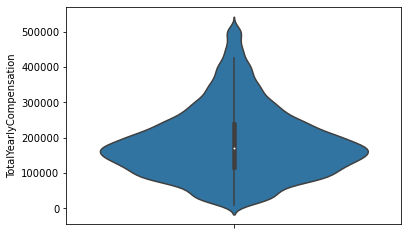

In [71]:
sns.violinplot(y = df["TotalYearlyCompensation"])  # Compensation distribution. Yearly compensation dist between $300k-150 k

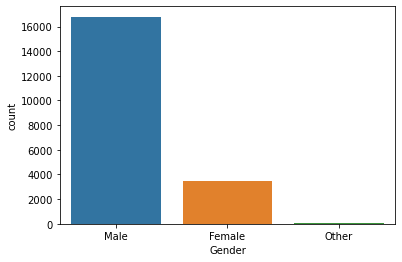

In [52]:
sns.countplot(df['Gender']) # Gender distribution 
plt.show()

Text(0.5, 1.0, 'Race Distribution By Gender')

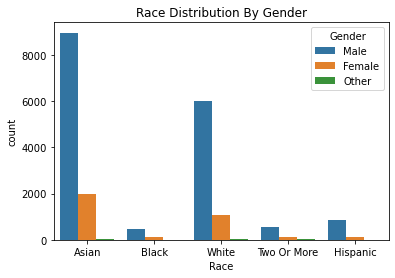

In [53]:
sns.countplot(data = df, x = "Race", hue = "Gender")  # How Race is distributed accross Gender
plt.title('Race Distribution By Gender')

Text(0.5, 1.0, 'Race Distribution By Gender')

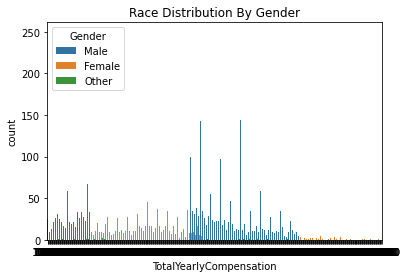

In [73]:
#sns.violinplot(x = df["Gender"], y = df["TotalYearlyCompensation"])
#plt.title('Distribution Of Yearly Compensation By Race')
#plt.minorticks_on() 

sns.countplot(data = df, x = "TotalYearlyCompensation", hue = "Gender")  # How Race is distributed accross Gender
plt.title('Race Distribution By Gender')

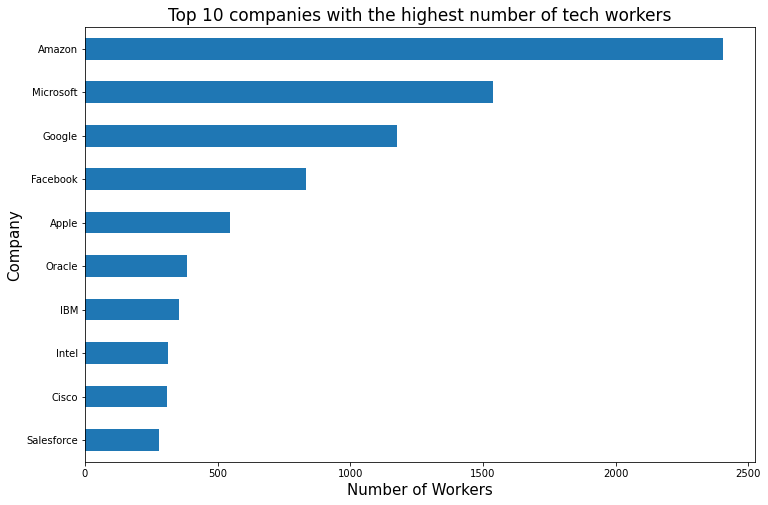

In [85]:
### Which Company hire most

companies_with_most_tech_workers = df['Company'].value_counts(ascending = False).head(10).sort_values(ascending = True).plot.barh(figsize = (12,8));
plt.title('Top 10 companies with the highest number of tech workers', size=17)
plt.xlabel('Number of Workers', size = 15)
plt.ylabel('Company', size = 15)
plt.show();


Text(0.5, 1.0, 'Titel accross Gender')

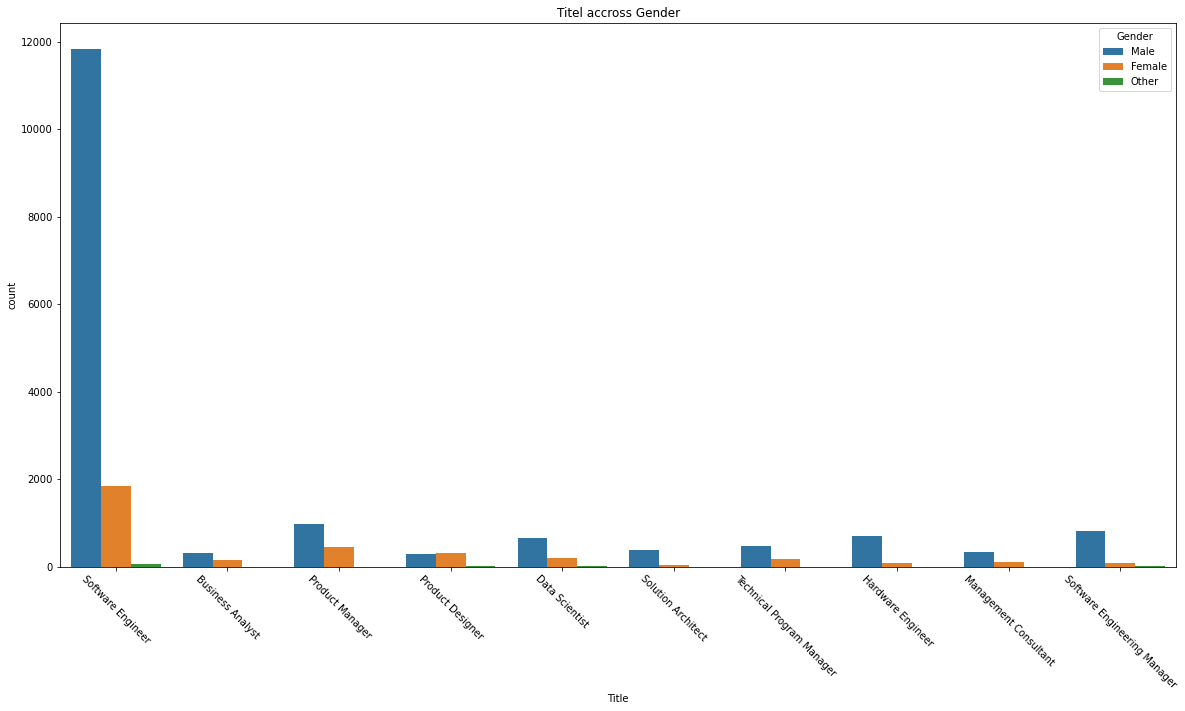

In [55]:
# How is Tech Titles distributed accross Gender

plt.figure(figsize=(20,10))

sns.countplot(data = df, x = "Title", hue = "Gender")

plt.xticks(rotation = -45)
plt.title('Titel accross Gender')

Text(0.5, 1.0, 'Yearly Compensation by Education')

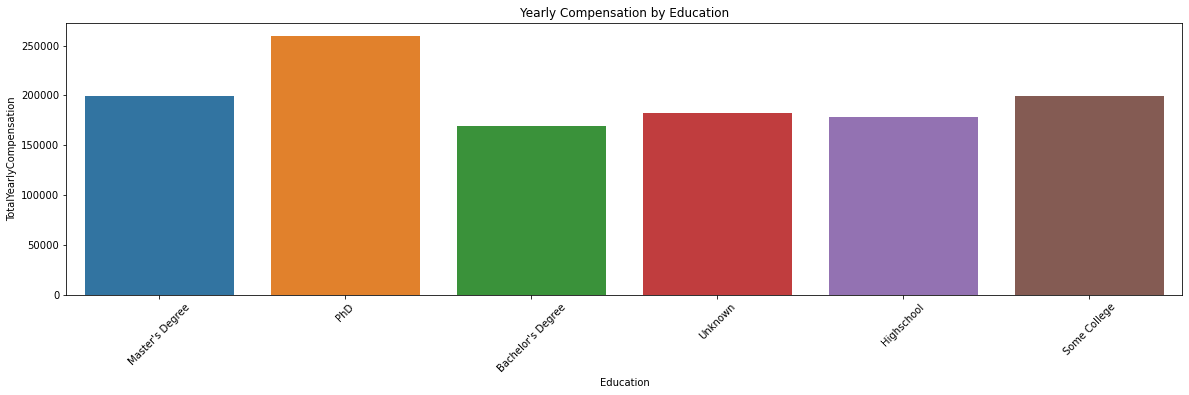

In [81]:
### barplot to show Yearly Compensation across Titels

plt.figure(figsize=(20,5))

sns.barplot(data = df, x = "Education", y = "TotalYearlyCompensation", ci = None)

plt.xticks(rotation = 45)
plt.title('Yearly Compensation by Education')

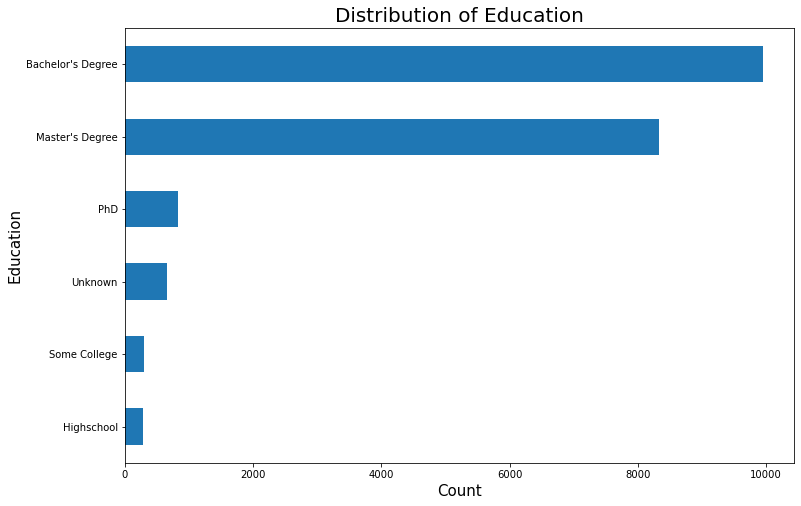

In [86]:
#How is Education distibuted?

education_distribution = df['Education'].value_counts(ascending = True).plot.barh(figsize = (12,8))
plt.title('Distribution of Education', size=20)
plt.xlabel('Count', size = 15)
plt.ylabel('Education', size = 15)
plt.show();


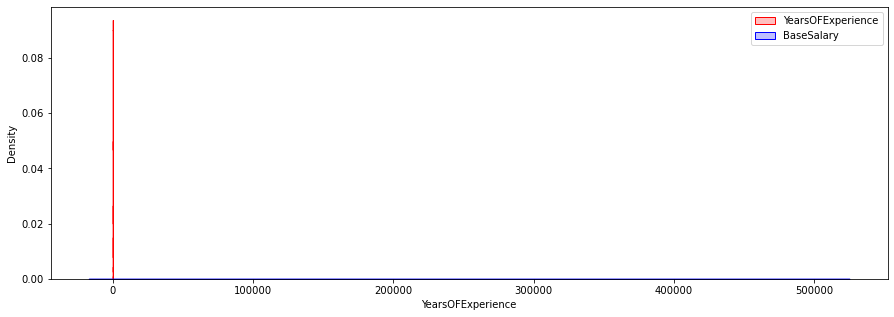

In [61]:
# Almost no correclation b/n Year of experience and Salary

plt.figure(figsize=(15,5)) ## change the figure size

sns.kdeplot(df['YearsOFExperience'], shade = True, color = "red", label = "YearsOFExperience")
sns.kdeplot(df['BaseSalary'], shade = True, color = "blue", label = "BaseSalary")

plt.legend() ## add a legend 
plt.show() ## show both plots in the same figure 

<AxesSubplot:>

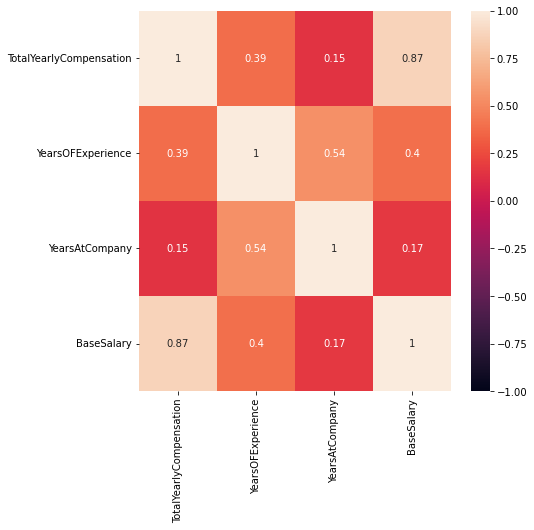

In [64]:
# correlation by heatmap
plt.figure(figsize=(7,7))

# calculate the correlation matrix for the numeric dataset 
corr = df.corr()

# plot a heat map to show the magnitude of the correlation between variables
sns.heatmap(corr, vmin = -1, annot = True)

Text(0.5, 1.0, 'Yearly Compensation by Title')

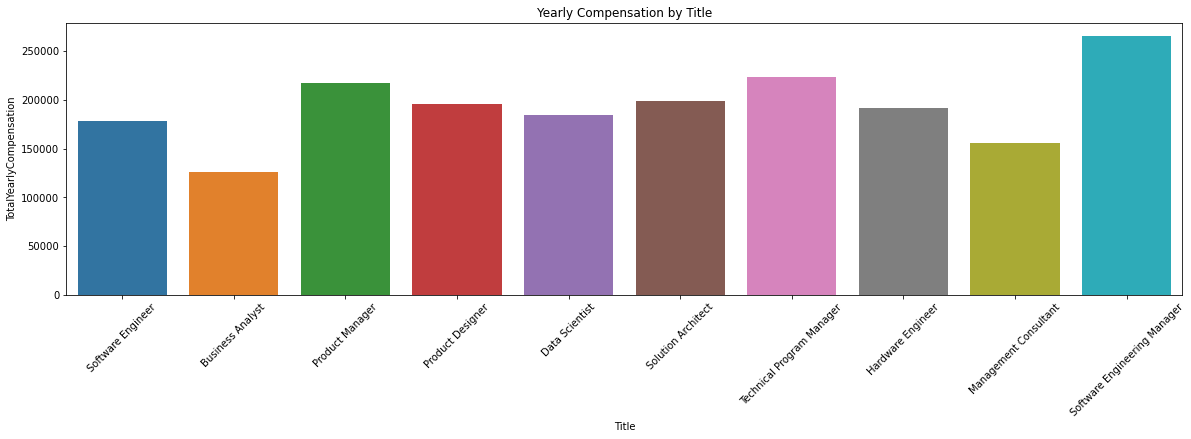

In [70]:
### barplot to show Average Yearly Compensation across Titels. 

plt.figure(figsize=(20,5))

sns.barplot(data = df, x = "Title", y = "TotalYearlyCompensation", ci = None)

plt.xticks(rotation = 45)
plt.title('Yearly Compensation by Title')

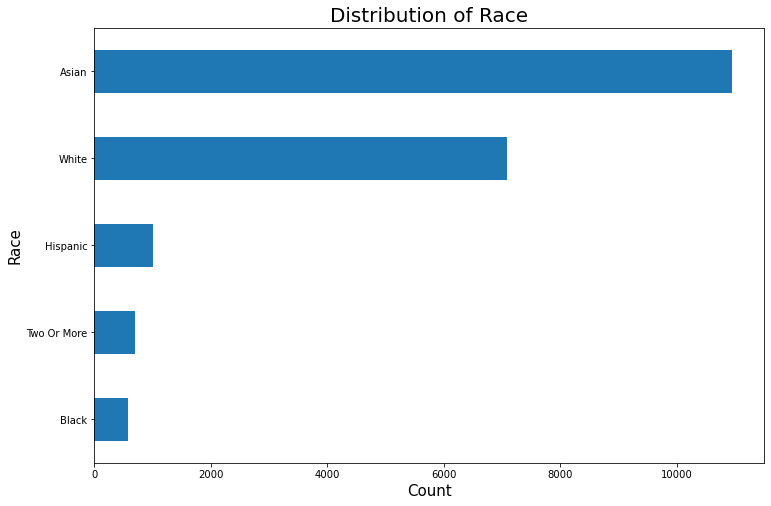

In [91]:
#How is Education distibuted?

education_distribution = df['Race'].value_counts(ascending = True).plot.barh(figsize = (12,8))
plt.title('Distribution of Race', size=20)
plt.xlabel('Count', size = 15)
plt.ylabel('Race', size = 15)
plt.show();

In [56]:
df.to_csv("Clean_Salary_Data.csv")  # save the final data.